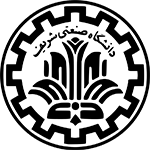

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
 Deep Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department - Fall 2025  <br>
<font color=3C99D size=5>
          Homework 4<br>
<font color=696880 size=4>

**Name**:  Ali Amjadi
  
**Student ID**: 404205889

# 🛢️ Oil Price Prediction using Time Series Models 📈

This notebook is designed for students to complete tasks related to oil price prediction using different machine learning models. 🚀

## 📚 References
- 📊 [Dataset: Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)
- 📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)

## 1️⃣ Introduction
🔍 One of the most common applications of recurrent neural networks is **time series forecasting**. In this assignment, you will predict **crude oil prices** using four different methods. 💡

## 2️⃣ Dataset and Preprocessing (25 Points)

### 📥 2.1 Download Dataset
📌 Download the dataset from **Yahoo Finance** for `CL=F` from **2010 to the present**.
[Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)

### 🎯 2.2 Select Features
✅ Select the `Adj Close` column as the **main feature**.

### ⚠️ **2.3 Handle Missing Data**

You will encounter missing data (`null` values) within your dataset. Follow these detailed steps carefully to handle the missing values and create a complete, reliable dataset:

#### 📝 Step 1: Introduce Random Missing Data
- Identify all indices in the `Adj Close` column that currently have valid (non-null) data.
- Set a random seed (`np.random.seed(42)`) for reproducibility.
- Randomly select **10%** of these valid indices and set their values to `NaN`.

#### 🔍 Step 2: Identify Missing Values
- Identify all dates where at least one column has a missing value (`NaN`).
- Print the number of missing dates and the total number of dates to evaluate the extent of missingness.

#### 🔧 Step 3: Replace Missing Values
- Create a copy of the `Adj Close` column for filling purposes.
- First, apply **linear interpolation** to estimate missing values based on surrounding data points.
- Then, use backward fill (`bfill`) followed by forward fill (`ffill`) methods to handle any remaining missing values at the start or end of the dataset.

#### 🎯 Outcome:
After completing these steps, your dataset will have no missing values in the `Adj Close` column, ready for further analysis or modeling.

🛠 *Your task:* Implement the missing data handling methods below. (16 Points)

In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# TO Do: Read the data and pring 5 examples
ticker = "CL=F"
start_date = "2010-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)

print(f"Downloaded data from {start_date} to {end_date}")
print(f"Data shape: {data.shape}\n")

print(f"Columns: {data.columns.tolist()}\n")

print("First 5 rows of the dataset (most recent dates):")
print(data.head(5))

print("\nFirst 5 rows of the dataset (oldest dates):")
print(data.tail(5))

/tmp/ipython-input-1255727775.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Downloaded data from 2010-01-01 to 2026-01-07
Data shape: (4027, 5)

Columns: [('Close', 'CL=F'), ('High', 'CL=F'), ('Low', 'CL=F'), ('Open', 'CL=F'), ('Volume', 'CL=F')]

First 5 rows of the dataset (most recent dates):
Price           Close       High        Low       Open  Volume
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F
Date                                                          
2010-01-04  81.510002  81.680000  79.629997  79.629997  263542
2010-01-05  81.769997  82.000000  80.949997  81.629997  258887
2010-01-06  83.180000  83.519997  80.849998  81.430000  370059
2010-01-07  82.660004  83.360001  82.260002  83.199997  246632
2010-01-08  82.750000  83.470001  81.800003  82.650002  310377

First 5 rows of the dataset (oldest dates):
Price           Close       High        Low       Open  Volume
Ticker           CL=F       CL=F       CL=F       CL=F    CL=F
Date                                                          
2025-12-30  57.950001  58.470001  57.5999

In [8]:
# TO DO: Introduce random null
import numpy as np
import pandas as pd

adj_close = data['Close']
adj_close_with_nulls = adj_close.copy()
np.random.seed(42)
mask = np.random.rand(len(adj_close_with_nulls)) < 0.10  # 10% missing
adj_close_with_nulls[mask] = np.nan

print(f"Original data points: {len(adj_close)}")
print(f"Missing values introduced: {mask.sum()}")
print(f"Missing percentage: {mask.sum()/len(adj_close)*100:.2f}%")

print("\nFirst 20 values with random nulls:")
print(adj_close_with_nulls.head(20))

Original data points: 4027
Missing values introduced: 428
Missing percentage: 10.63%

First 20 values with random nulls:
Ticker           CL=F
Date                 
2010-01-04  81.510002
2010-01-05  81.769997
2010-01-06  83.180000
2010-01-07  82.660004
2010-01-08  82.750000
2010-01-11  82.519997
2010-01-12        NaN
2010-01-13  79.650002
2010-01-14  79.389999
2010-01-15  78.000000
2010-01-19        NaN
2010-01-20  77.620003
2010-01-21  76.080002
2010-01-22  74.540001
2010-01-25  75.260002
2010-01-26  74.709999
2010-01-27  73.669998
2010-01-28  73.639999
2010-01-29  72.889999
2010-02-01  74.430000


In [11]:
from pandas._libs import missing
# TO DO: Identify missing dates and null values
full_date_range = pd.date_range(start=adj_close_with_nulls.index.min(), end=adj_close_with_nulls.index.max(), freq='B')
missing_dates = full_date_range[~full_date_range.isin(adj_close_with_nulls.index)]

print(f"Total expected trading days: {len(full_date_range)}")
print(f"Dates in your dataset: {len(adj_close_with_nulls)}")
print(f"Missing dates (gaps): {len(missing_dates)}")



Total expected trading days: 4177
Dates in your dataset: 4027
Missing dates (gaps): 150


In [21]:
# TO DO: Fill missing values using .interpolate or .fillna(method='bfill').fillna(method='ffill')

filled_interpolate = adj_close_with_nulls.interpolate()

print(f"Original null count: {adj_close_with_nulls.isnull().sum()}")
print(f"After interpolation null count: {filled_interpolate.isnull().sum()}")




Original null count: Ticker
CL=F    428
dtype: int64
After interpolation null count: Ticker
CL=F    0
dtype: int64


### ✂️ 2.4 Train-Test Split and Normalization
- **Split** the dataset into **training and test sets** based on the ratio given in the reference paper.
- **Normalize** the data.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)

🛠 *Your task:* Implement the splitting and normalization below. (4 Points)

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def temporal_split(series, train_ratio=0.6, val_ratio=0.2):
    """
    Split time series data sequentially (not randomly) into train, validation, and test sets.
    """
    # Calculate split indices based on ratios
    n = len(series)
    train_end = int(n * train_ratio)
    val_end = train_end + int(n * val_ratio)

    # Split the series sequentially (by time order)
    train = series.iloc[:train_end]
    val = series.iloc[train_end:val_end]
    test = series.iloc[val_end:]

    return train, val, test

# Check what type of data we have
print(f"Type of filled_data: {type(filled_data)}")

# If filled_data is a Series (not DataFrame), handle it differently
if isinstance(filled_data, pd.Series):
    print("filled_data is a Series, converting to DataFrame...")
    filled_data = pd.DataFrame(filled_data)
    print(f"DataFrame columns: {filled_data.columns.tolist()}")

    # If the Series has a name, that becomes the column name
    # We need to rename it to 'Adj Close' for consistency
    if filled_data.columns[0] != 'Adj Close':
        filled_data.columns = ['Adj Close']
        print(f"Renamed column to: {filled_data.columns.tolist()}")

# If it's already a DataFrame, check the column names
elif isinstance(filled_data, pd.DataFrame):
    print(f"filled_data is a DataFrame with columns: {filled_data.columns.tolist()}")

    # If 'Adj Close' doesn't exist, check what columns we have
    if 'Adj Close' not in filled_data.columns:
        print("Warning: 'Adj Close' column not found!")

        # Check if there's only one column (maybe named differently)
        if len(filled_data.columns) == 1:
            print(f"Renaming single column '{filled_data.columns[0]}' to 'Adj Close'")
            filled_data.columns = ['Adj Close']
        else:
            # If multiple columns, check if price data is in a different column
            price_cols = [col for col in filled_data.columns if any(keyword in str(col).lower()
                         for keyword in ['close', 'price', 'value', '0'])]
            if price_cols:
                print(f"Found potential price columns: {price_cols}")
                # Use the first one
                filled_data = filled_data[[price_cols[0]]]
                filled_data.columns = ['Adj Close']
                print(f"Using column '{price_cols[0]}' as 'Adj Close'")

# Now perform temporal split
train, val, test = temporal_split(filled_data)

print(f"\nData split sizes:")
print(f"  Training: {len(train)} samples ({len(train)/len(filled_data)*100:.1f}%)")
print(f"  Validation: {len(val)} samples ({len(val)/len(filled_data)*100:.1f}%)")
print(f"  Testing: {len(test)} samples ({len(test)/len(filled_data)*100:.1f}%)")

# Initialize the scaler
scaler = MinMaxScaler()

# Extract column names for clarity
target_column = 'Adj Close'

# Scale the data
# Fit on training data, transform on all sets
train_scaled = scaler.fit_transform(train[[target_column]])
val_scaled = scaler.transform(val[[target_column]])
test_scaled = scaler.transform(test[[target_column]])

# Create new DataFrames with scaled values
train_data = pd.DataFrame(train_scaled, index=train.index, columns=[target_column])
val_data = pd.DataFrame(val_scaled, index=val.index, columns=[target_column])
test_data = pd.DataFrame(test_scaled, index=test.index, columns=[target_column])

print("\n" + "="*50)
print("Training data sample (scaled):")
print(train_data.head())
print(f"\nTraining data range: [{train_data[target_column].min():.4f}, {train_data[target_column].max():.4f}]")

print("\n" + "="*50)
print("Validation data sample (scaled):")
print(val_data.head())
print(f"\nValidation data range: [{val_data[target_column].min():.4f}, {val_data[target_column].max():.4f}]")

print("\n" + "="*50)
print("Testing data sample (scaled):")
print(test_data.head())
print(f"\nTesting data range: [{test_data[target_column].min():.4f}, {test_data[target_column].max():.4f}]")



Type of filled_data: <class 'pandas.core.frame.DataFrame'>
filled_data is a DataFrame with columns: ['CL=F']
Renaming single column 'CL=F' to 'Adj Close'

Data split sizes:
  Training: 2416 samples (60.0%)
  Validation: 805 samples (20.0%)
  Testing: 806 samples (20.0%)

Training data sample (scaled):
            Adj Close
Date                 
2010-01-04   0.630415
2010-01-05   0.633379
2010-01-06   0.649453
2010-01-07   0.643525
2010-01-08   0.644551

Training data range: [0.0000, 1.0000]

Validation data sample (scaled):
            Adj Close
Date                 
2019-08-13   0.352143
2019-08-14   0.343669
2019-08-15   0.335195
2019-08-16   0.326721
2019-08-19   0.341997

Validation data range: [-0.7278, 1.1114]

Testing data sample (scaled):
            Adj Close
Date                 
2022-10-21   0.670771
2022-10-24   0.681639
2022-10-25   0.692507
2022-10-26   0.703374
2022-10-27   0.716712

Testing data range: [0.3313, 0.7692]


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def temporal_split(series, train_ratio=0.6, val_ratio=0.2):
    pass
    #TO DO
    n = len(series)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))

    train = series[:train_end]
    val = series[train_end:val_end]
    test = series[val_end:]

    return train, val, test

train_list, val_list, test_list = [], [], []

filled_data = filled_interpolate.copy()

train, val, test = temporal_split(filled_data)
train_list.append(train)
val_list.append(val)
test_list.append(test)

train_data = train_data.to_frame(name='Adj Close') if isinstance(train_data, pd.Series) else train_data
val_data = val_data.to_frame(name='Adj Close') if isinstance(val_data, pd.Series) else val_data
test_data = test_data.to_frame(name='Adj Close') if isinstance(test_data, pd.Series) else test_data

print(f"Training data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Testing data shape: {test_data.shape}")

scaler = MinMaxScaler()
train_data[['Adj Close']] = scaler.fit_transform(train_data[['Adj Close']])
val_data[['Adj Close']] = scaler.transform(val_data[['Adj Close']])
test_data[['Adj Close']] = scaler.transform(test_data[['Adj Close']])

print("Training data sample:")
print(train_data.head())
print("Testing data sample:")
print(test_data.head())

Training data shape: (2416, 1)
Validation data shape: (805, 1)
Testing data shape: (806, 1)
Training data sample:
            Adj Close
Date                 
2010-01-04   0.630415
2010-01-05   0.633379
2010-01-06   0.649453
2010-01-07   0.643525
2010-01-08   0.644551
Testing data sample:
            Adj Close
Date                 
2022-10-21   0.670771
2022-10-24   0.681639
2022-10-25   0.692507
2022-10-26   0.703374
2022-10-27   0.716712


### 📊 2.5 Data Visualization
- **Plot a histogram** similar to **Figure 6** in the reference paper, showing the **distribution of oil prices**.

🛠 *Your task:* Implement the histogram plot below. (5 Points)

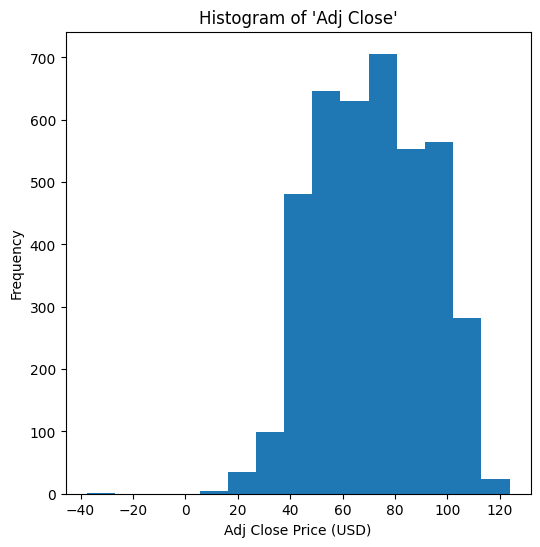

In [80]:
# TO DO: Plot histogram of 'Adj Close'
plt.figure(figsize=(6, 6))
plt.hist(filled_data, bins=15)
plt.title("Histogram of 'Adj Close'")
plt.xlabel('Adj Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

## 3️⃣ Implementing Deep Learning Models 🤖 (60 Points)

The reference paper utilizes **three models** for time series forecasting:
- `RNN`
- `LSTM`
- `GRU`

📌 **Train** each model using the **hyperparameters** given in **Table 4** of the paper.
📌 Use `Mean Square Error (MSE)` as the **loss function**.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/2149/pdf)


### Important Details & Clarifications

- **What to Predict?**  
  The goal is to predict **the actual next-day price** (regression problem), rather than just identifying price increase or decrease.
  
- **Input/Output Structure:**  
  - **Input:** A window of \( k \) consecutive daily prices (e.g., 50 days).  
  - **Output:** The predicted price for the next day.
  
- **How to Evaluate?**  
  Use the four metrics (RMSE, MAE, MAPE, \( R^2 \)) to gauge how accurately your model tracks the real price values.

- **Target Accuracy:**  
  Your accuracy might differ from the paper’s due to factors like data splitting, normalization, or different random seeds. However, aim to closely replicate the paper’s results or provide justifications for any discrepancy.

**Final Deliverables:**
1. **All four trained models** (RNN, LSTM, GRU).  
2. **Comparison plots** of predicted vs. actual values (in both normalized and original price scales, if desired).  
3. **Performance metrics** (RMSE, MAE, MAPE, \( R^2 \)) for each model, presented in a table or a concise summary.


🛠 *Your task:* Implement these models below. (30 Points)

In [82]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        # Get window of data for input
        seq = data[i:i + window_size]
        # Get the next value as target
        target = data[i + window_size]

        sequences.append(seq)
        targets.append(target)

    # Convert to PyTorch tensors
    sequences = torch.tensor(sequences, dtype=torch.float32)
    targets = torch.tensor(targets, dtype=torch.float32)
    return sequences, targets


window_size = 50


# Convert DataFrame columns to numpy arrays
train_values = train_data['Adj Close'].values
val_values = val_data['Adj Close'].values
test_values = test_data['Adj Close'].values

# Create sequences for each dataset
train_sequences, train_targets = create_sequences(train_values, window_size)
val_sequences, val_targets = create_sequences(val_values, window_size)
test_sequences, test_targets = create_sequences(test_values, window_size)

# Create TensorDatasets
train_dataset = TensorDataset(train_sequences, train_targets)
val_dataset = TensorDataset(val_sequences, val_targets)
test_dataset = TensorDataset(test_sequences, test_targets)

# Create DataLoaders
batch_size = 100

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nNumber of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of testing batches: {len(test_loader)}")




Number of training batches: 24
Number of validation batches: 8
Number of testing batches: 8


In [84]:
# LSTM
from tqdm import tqdm
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

lstm_model = LSTMModel()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

def train_model(model, train_loader, test_loader, epochs=50):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
      # Training
      model.train()
      for sequences, targets in train_loader:
          sequences = sequences.unsqueeze(-1).to(device)
          targets = targets.unsqueeze(-1).to(device)

          optimizer.zero_grad()
          predictions = model(sequences)
          loss = loss_fn(predictions, targets)
          loss.backward()
          optimizer.step()

      # Validation every 10 epochs
      if (epoch + 1) % 10 == 0:
          model.eval()
          with torch.no_grad():
              val_loss = 0
              for sequences, targets in test_loader:
                  sequences = sequences.unsqueeze(-1).to(device)
                  targets = targets.unsqueeze(-1).to(device)
                  predictions = model(sequences)
                  val_loss += loss_fn(predictions, targets).item()

              print(f'Epoch {epoch+1}, Val Loss: {val_loss/len(test_loader):.6f}')

train_model(lstm_model, train_loader, test_loader)

Training:  20%|██        | 10/50 [00:28<01:22,  2.06s/epoch]

Epoch 10, Val Loss: 0.001080


Training:  40%|████      | 20/50 [00:48<01:03,  2.11s/epoch]

Epoch 20, Val Loss: 0.000851


Training:  60%|██████    | 30/50 [01:06<00:37,  1.89s/epoch]

Epoch 30, Val Loss: 0.001097


Training:  80%|████████  | 40/50 [01:25<00:19,  1.93s/epoch]

Epoch 40, Val Loss: 0.000805


Training: 100%|██████████| 50/50 [01:43<00:00,  2.08s/epoch]

Epoch 50, Val Loss: 0.000632


In [87]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

rnn_model = RNNModel()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
train_model(rnn_model, train_loader, test_loader)


Training:  20%|██        | 10/50 [00:07<00:31,  1.27epoch/s]

Epoch 10, Val Loss: 0.000550


Training:  40%|████      | 20/50 [00:17<00:33,  1.12s/epoch]

Epoch 20, Val Loss: 0.000578


Training:  60%|██████    | 30/50 [00:24<00:14,  1.36epoch/s]

Epoch 30, Val Loss: 0.000491


Training:  80%|████████  | 40/50 [00:29<00:04,  2.13epoch/s]

Epoch 40, Val Loss: 0.000365


Training: 100%|██████████| 50/50 [00:32<00:00,  1.53epoch/s]

Epoch 50, Val Loss: 0.000345


In [88]:
# GRU
class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

gru_model = GRUModel()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
train_model(gru_model, train_loader, test_loader)

Training:  20%|██        | 10/50 [00:25<01:18,  1.95s/epoch]

Epoch 10, Val Loss: 0.000456


Training:  40%|████      | 20/50 [00:45<01:01,  2.06s/epoch]

Epoch 20, Val Loss: 0.000383


Training:  60%|██████    | 30/50 [01:03<00:37,  1.85s/epoch]

Epoch 30, Val Loss: 0.000347


Training:  80%|████████  | 40/50 [01:23<00:20,  2.08s/epoch]

Epoch 40, Val Loss: 0.000318


Training: 100%|██████████| 50/50 [01:41<00:00,  2.03s/epoch]

Epoch 50, Val Loss: 0.000303


### 📈 3.1 Prediction and Evaluation
1. **Prediction:** After training, generate predictions for the test set (i.e., predict the next-day price based on the preceding \( k \) days).
2. **Visualization:** **Plot the predicted values** alongside the **actual values** for each model. This comparison helps in visually assessing each model’s performance.

🛠 **Your Task:** Implement the **visualization of predictions** (15 Points).

In [93]:
# Predictions
def predict(model, data_loader):
    device = next(model.parameters()).device
    model.eval()  # Set model to evaluation mode

    predictions = []
    actuals = []

    with torch.no_grad():
        for sequences, targets in data_loader:
            sequences = sequences.unsqueeze(-1).to(device)

            # Get predictions
            batch_predictions = model(sequences)

            # Store results
            predictions.extend(batch_predictions.cpu().numpy().flatten())
            actuals.extend(targets.numpy().flatten())

    return predictions, actuals

#TO DO: predict real outputs

# Make predictions with LSTM model
lstm_preds, lstm_actuals = predict(lstm_model, test_loader)

# Make predictions with RNN model
rnn_preds, rnn_actuals = predict(rnn_model, test_loader)

# Make predictions with GRU model
gru_preds, gru_actuals = predict(gru_model, test_loader)

# Calculate MSE for each model
from sklearn.metrics import mean_squared_error

lstm_mse = mean_squared_error(lstm_actuals, lstm_preds)
rnn_mse = mean_squared_error(rnn_actuals, rnn_preds)
gru_mse = mean_squared_error(gru_actuals, gru_preds)

print(f"\nModel Performance (MSE):")
print(f"LSTM: {lstm_mse:.6f}")
print(f"RNN:  {rnn_mse:.6f}")
print(f"GRU:  {gru_mse:.6f}")


Model Performance (MSE):
LSTM: 0.000654
RNN:  0.000357
GRU:  0.000314


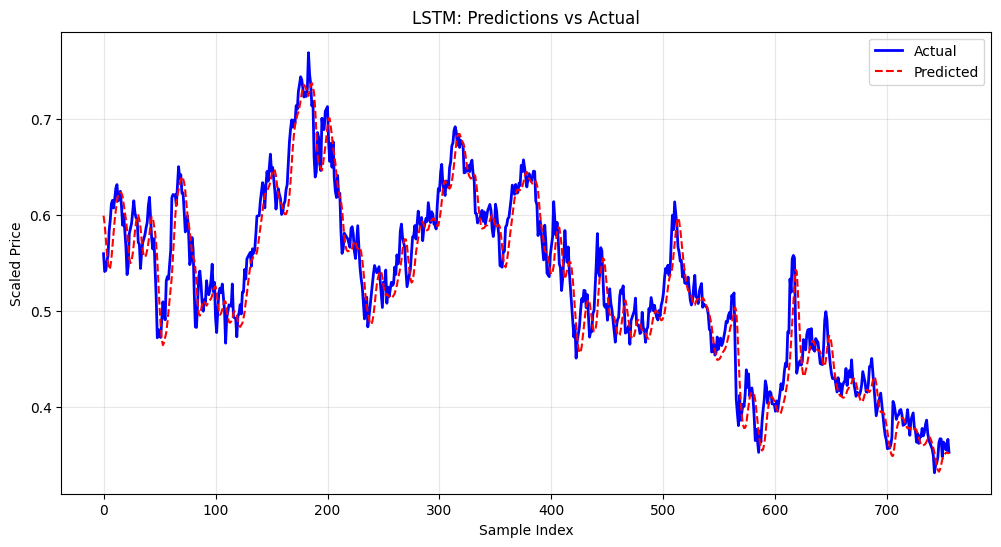

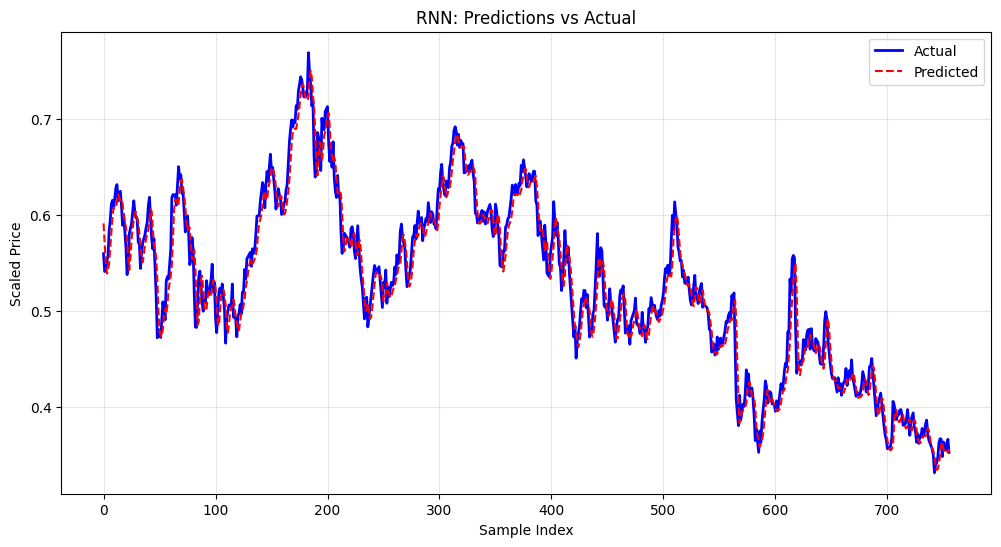

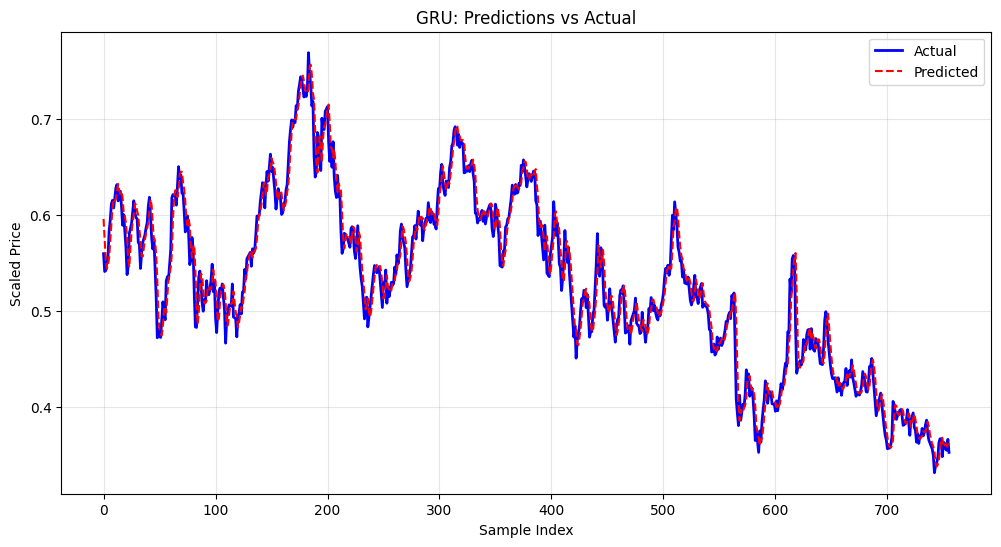

In [94]:
def plot_predictions(predictions, actual, model_name):
    """
    Plot predictions vs actual values for a single model.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(actual, 'b-', label='Actual', linewidth=2)
    plt.plot(predictions, 'r--', label='Predicted', linewidth=1.5)
    plt.title(f'{model_name}: Predictions vs Actual')
    plt.xlabel('Sample Index')
    plt.ylabel('Scaled Price')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot all models
plot_predictions(lstm_preds, lstm_actuals, 'LSTM')
plot_predictions(rnn_preds, rnn_actuals, 'RNN')
plot_predictions(gru_preds, gru_actuals, 'GRU')

### 📊 3.2 Error Metrics
📌 Explain the following **error metrics** used in the paper:
- `RMSE` (Root Mean Square Error)
- `MAE` (Mean Absolute Error)
- `MAPE` (Mean Absolute Percentage Error)
- `R-Squared` (Coefficient of Determination)

**📌 Instruction:**  
Explain each of these error metrics and calculate them for **each model** (RNN, LSTM, GRU). Compare your results with the paper’s findings to see how closely they match.

🛠 *Your task:* Implement the evaluation metrics below. (15 Points)

In [ ]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(predictions, actual):
    # Convert to numpy arrays if they aren't already
    predictions = np.array(predictions)
    actual = np.array(actual)

    # Calculate metrics
    mae = mean_absolute_error(actual, predictions)
    mse = mean_squared_error(actual, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predictions)

    # Calculate MAPE (handle division by zero)
    # Filter out zero actual values to avoid division by zero
    non_zero_mask = actual != 0
    if np.any(non_zero_mask):
        mape = np.mean(np.abs((actual[non_zero_mask] - predictions[non_zero_mask]) / actual[non_zero_mask])) * 100
    else:
        mape = np.nan  # If all actual values are zero, MAPE is undefined

    # Return as dictionary
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

print("RNN Metrics (Unscaled):", calculate_metrics(rnn_predictions, actual_values))
print("LSTM Metrics (Unscaled):", calculate_metrics(lstm_predictions, actual_values))
print("GRU Metrics (Unscaled):", calculate_metrics(gru_predictions, actual_values))

In [ ]:
# Fill missing values for all features
filled_data = data.copy()
for column in ['Open', 'High', 'Low', 'Volume', 'Adj Close']:
    filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# WE WILL USE THESE IN ARIMA PART AS INPUTS OF MODELS
train_data = filled_data.iloc[:-int(0.3 * len(filled_data))]
test_data = filled_data.iloc[-int(0.3 * len(filled_data)):]
train_target = train_data['Adj Close']
train_exog = train_data[['Open', 'High', 'Low', 'Volume']]
test_exog = test_data[['Open', 'High', 'Low', 'Volume']]

# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Adj Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")
print("The series is stationary." if result[1] < 0.05 else "The series is not stationary.")

## 4️⃣ ARIMA Model 📉 (15 Points)

📌 Explain the **difference** between `ARIMA` and `SARIMA` models.

📌 List the **advantages** and **limitations** of `ARIMA`.

📌 Explain the **mathematical formulation** of `ARIMA`, including its **parameters**.

📌 Determine the **optimal parameters** for `ARIMA` and **report the results**.

📌 Compare the results with **Table 6** from the paper.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

🛠 *Your task:* Implement the ARIMA model below.

In [ ]:
# Train ARIMA model using auto_arima
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

#TO DO:Find optimal arima model using auto_arima
print(f"Optimal ARIMA Order: {arima_model.order}")

In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="statsmodels")

#TO DO: Predinct Arima outputs

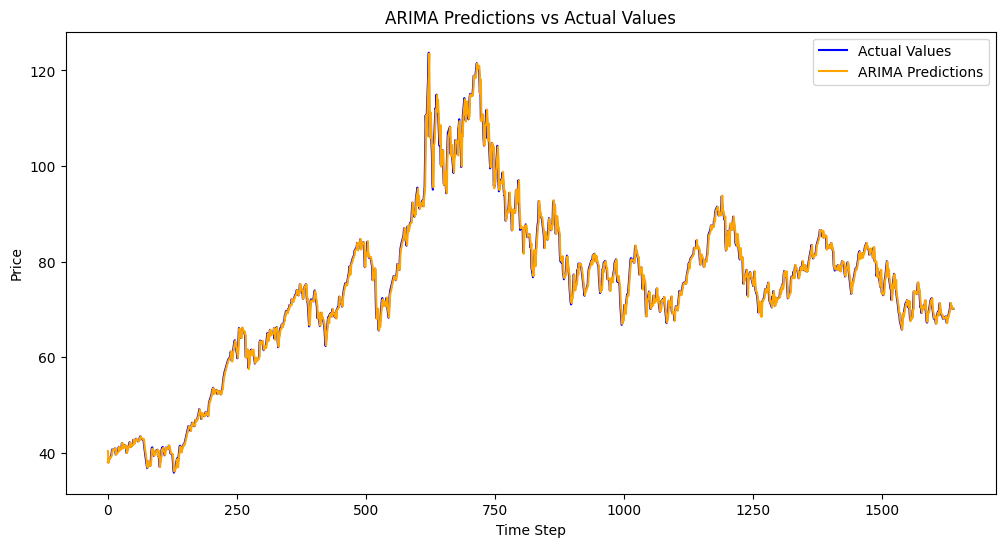

In [ ]:
#TO DO: Plot ARIMA vs actual